<a href="https://colab.research.google.com/github/GustavoCarvalho25/IA-Material/blob/master/KNN_GustavoCarvalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as numpy
import pandas as pandas
import matplotlib.pyplot as plot

In [19]:
# Calcula a distancia euclidiana entre os dados de entrada (data) e o exemplo de teste (test)
def euclidean_distance(data,test):
    distance = numpy.sqrt(numpy.sum((data- test)**2, axis=1))
    return distance

# Retorna o elemento mais comum de uma lista
def most_common(lst):
    return max(set(lst), key=lst.count)

In [20]:
# classe K-NN
class KNeighborsClassifier():
    # k eh o numero de vizinhos
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None
    # Simula o treinamento (armazena os dados de treinamento)
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    # Faz a predição
    def predict(self, X_test):
        neighbors = []
        # Iterando sobre cada exemplo de teste
        for x in X_test:
            # calcula a distancia euclidiana para o exemplo de teste
            distances = euclidean_distance(self.X_train, x)
            # ordena os exemplos de treinamento de acordo com a distância para o exemplo de teste
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            # adiciona na lista neighbors somente os k vizinhos mais próximos do exemplo de teste
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))

    # Avaliar o desempenho do K-NN
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

In [21]:
# Carregando os dados de treinamento e teste
data_train = pandas.read_csv("data1_train.csv")
data_test = pandas.read_csv("data1_test_labeled.csv")

X_train = numpy.array(data_train.iloc[:, :-1])
y_train = numpy.array(data_train.iloc[:, -1])
X_test = numpy.array(data_test.iloc[:, :-1])
y_test = numpy.array(data_test.iloc[:, -1])

In [22]:
# Testando diferentes valores de k e calculando a acurácia para cada valor
k_values = [1, 3, 5, 11, 45, 95]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)
    print(f"Acurácia para k={k}: {accuracy:.2f}")


Acurácia para k=1: 0.95
Acurácia para k=3: 0.95
Acurácia para k=5: 0.97
Acurácia para k=11: 0.97
Acurácia para k=45: 0.92
Acurácia para k=95: 0.33


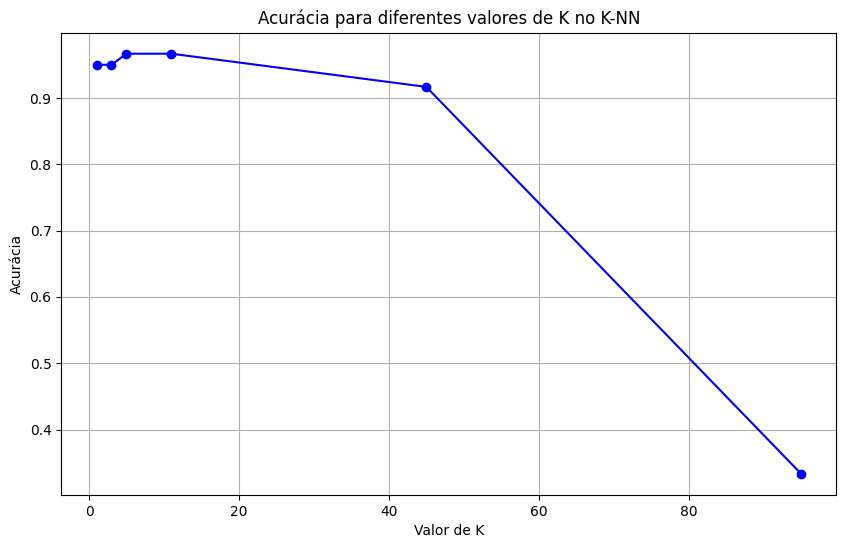

In [23]:
# Plotando o gráfico
plot.figure(figsize=(10, 6))
plot.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plot.xlabel('Valor de K')
plot.ylabel('Acurácia')
plot.title('Acurácia para diferentes valores de K no K-NN')
plot.grid(True)
plot.show()